## Part 0: Import Required Packages

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stat
import time
import csv
import seaborn as sns

## Part 1: Data Preprocessing

### 1.1 Sample Data Preprocessing

In [2]:
# Define function for preprocessing sample data
def samples_data_preprocessing(df_file):
    df_file = df_file.groupby(df_file.index).mean()  # Remove duplicates by averaging
    df_file = df_file.dropna(axis=0, how='all')       # Drop rows where all values are NaN
    df_file = df_file.loc[(df_file != 0).any(1)]      # Drop rows where all values are 0
    return df_file

In [3]:
# Load and preprocess reference samples
reference_samples_file = pd.read_csv("data/raw_data_57_reference_samples.csv", index_col="GeneSymbol")
reference_samples_file = samples_data_preprocessing(reference_samples_file)
reference_samples_file

/var/folders/1q/ym07p6ld70g5zn9sf3b4hw5h0000gn/T/ipykernel_761/2699664347.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_file = df_file.loc[(df_file != 0).any(1)]      # Drop rows where all values are 0


,ALIQUOT158,ALIQUOT159,ALIQUOT160,ALIQUOT169,ALIQUOT170,ALIQUOT181,ALIQUOT182,ALIQUOT191,ALIQUOT192,ALIQUOT206,...,CPT0248320009,CPT0254740009,CPT0264180009,CPT0347760005,CPT0347790005,CPT0347820005,CPT0347850005,CPT0347880005,CPT0347910005,CPT0355180006
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0390,0.0360,0.0418,0.0446,0.0159,0.0130,0.0183,0.0282,0.0118,0.0887,...,0.1469,0.3282,0.0425,0.0360,0.0675,0.0665,0.0790,0.1091,0.0526,0.2385
A1BG-AS1,0.3541,0.3097,0.4601,0.3202,0.4230,0.3165,0.3070,0.2525,0.2783,0.6890,...,0.5416,1.4684,0.3307,0.1107,0.2641,0.2542,0.2346,0.1773,0.4902,1.0700
A1CF,0.1084,0.1652,0.0553,0.0590,0.0698,0.0893,0.0842,0.1351,0.0392,0.9804,...,23.7284,0.1337,11.7164,4.0468,5.6232,3.1641,2.3269,3.0852,8.8346,1.6862
A2M,0.5911,0.2846,0.5294,1.0926,1.9806,1.1036,21.0531,3.2039,0.4943,7.5921,...,86.7223,92.4182,81.5609,33.5791,59.8383,28.3582,35.8550,26.2477,88.9583,253.8788
A2M-AS1,0.1425,0.0789,0.0892,0.1088,0.1165,0.0712,0.1341,0.1544,0.0752,0.3512,...,0.9457,10.9258,1.4859,1.4954,1.0321,0.6209,0.6391,0.8107,2.2343,4.5038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.3049,0.3932,0.3690,0.3366,0.1701,0.1606,0.0835,0.1743,0.1856,0.0568,...,0.4178,0.3201,0.0673,0.0483,0.0576,0.0693,0.0289,0.0310,0.0168,0.1566
ZYG11B,6.0472,6.8134,7.8471,6.3374,6.6756,6.3680,7.3323,6.4594,5.8835,5.6846,...,10.3403,9.1689,10.2970,4.2777,6.8419,4.3488,4.8175,2.8464,9.0126,14.4507
ZYX,41.2477,37.7143,53.0989,43.7776,45.1702,43.8657,46.4711,45.8992,49.5579,21.1981,...,5.8972,21.7220,6.5477,4.5768,4.2443,6.5087,5.8853,5.2373,8.2578,11.6504


In [4]:
# Load and preprocess experimental samples
n_samples_file = pd.read_csv("data/raw_data_8_samples_data.csv", index_col="GeneSymbol")
n_samples_file = samples_data_preprocessing(n_samples_file)
n_samples_file

/var/folders/1q/ym07p6ld70g5zn9sf3b4hw5h0000gn/T/ipykernel_761/2699664347.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_file = df_file.loc[(df_file != 0).any(1)]      # Drop rows where all values are 0


,GSM1498849,GSM1498850,GSM1498851,GSM1498852,GSM1498853,GSM1498854,GSM1498855,GSM1498856
GeneSymbol,,,,,,,,
A1CF,6.168445,7.132283,7.132708,6.283982,5.752754,5.762942,5.050569,4.877080
A2M,12.811660,15.112969,15.112969,12.805885,14.418367,14.404677,17.127666,17.127666
A4GNT,9.458631,3.616606,2.431562,9.377925,3.358082,3.528290,2.447426,2.549974
AAAS,11.001582,10.656238,10.672538,11.004115,11.003957,10.997172,10.714908,10.721170
AACS,4.324310,3.353254,2.431562,4.088551,5.061152,4.995973,3.783496,3.515290
...,...,...,...,...,...,...,...,...
ZXDC,7.600502,7.838991,7.845660,7.514762,7.906278,7.859249,8.132654,8.109499
ZYG11A,5.531060,5.867025,5.866395,5.545300,6.191154,6.244648,6.233404,6.298034
ZYG11B,3.248612,6.526677,6.477582,2.414883,7.268256,7.222233,5.366504,5.278167


In [5]:
# Merge the preprocessed reference and experimental samples
merge_initial_file = pd.merge(reference_samples_file, n_samples_file, on='GeneSymbol')
merge_initial_file

,ALIQUOT158,ALIQUOT159,ALIQUOT160,ALIQUOT169,ALIQUOT170,ALIQUOT181,ALIQUOT182,ALIQUOT191,ALIQUOT192,ALIQUOT206,...,CPT0347910005,CPT0355180006,GSM1498849,GSM1498850,GSM1498851,GSM1498852,GSM1498853,GSM1498854,GSM1498855,GSM1498856
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1CF,0.1084,0.1652,0.0553,0.0590,0.0698,0.0893,0.0842,0.1351,0.0392,0.9804,...,8.8346,1.6862,6.168445,7.132283,7.132708,6.283982,5.752754,5.762942,5.050569,4.877080
A2M,0.5911,0.2846,0.5294,1.0926,1.9806,1.1036,21.0531,3.2039,0.4943,7.5921,...,88.9583,253.8788,12.811660,15.112969,15.112969,12.805885,14.418367,14.404677,17.127666,17.127666
A4GNT,0.0588,0.1140,0.1577,0.1683,0.0361,0.1468,0.2075,0.1434,0.0798,2.6247,...,3.2858,5.3807,9.458631,3.616606,2.431562,9.377925,3.358082,3.528290,2.447426,2.549974
AAAS,9.4460,8.2928,8.4380,8.7015,8.7655,8.8022,8.0564,8.6177,9.3340,8.8580,...,5.3960,5.8016,11.001582,10.656238,10.672538,11.004115,11.003957,10.997172,10.714908,10.721170
AACS,10.5395,10.9279,10.0337,8.8955,10.5009,9.1820,9.3313,9.8306,9.5733,7.1582,...,1.8553,1.7291,4.324310,3.353254,2.431562,4.088551,5.061152,4.995973,3.783496,3.515290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,4.7470,4.5193,4.6056,5.1009,4.5960,5.1099,4.3483,4.7781,4.5169,4.7931,...,8.2819,5.5041,7.600502,7.838991,7.845660,7.514762,7.906278,7.859249,8.132654,8.109499
ZYG11A,0.3049,0.3932,0.3690,0.3366,0.1701,0.1606,0.0835,0.1743,0.1856,0.0568,...,0.0168,0.1566,5.531060,5.867025,5.866395,5.545300,6.191154,6.244648,6.233404,6.298034
ZYG11B,6.0472,6.8134,7.8471,6.3374,6.6756,6.3680,7.3323,6.4594,5.8835,5.6846,...,9.0126,14.4507,3.248612,6.526677,6.477582,2.414883,7.268256,7.222233,5.366504,5.278167


### 1.2 Preprocessing Protein-Protein Interaction (PPI) Data

In [6]:
# Define function for preprocessing PPI data
def data_preprocessing_with_PPI(df_file):
    df_info = pd.read_csv("data/string-db-9606.protein/9606.protein.info.v11.5.txt", sep="\t")  # Load protein info
    df_file = df_file.groupby(df_file.index).mean()    # Remove duplicates by averaging
    df_file = df_file.dropna(axis=0, how='all')        # Drop rows where all values are NaN
    df_file = df_file.loc[(df_file != 0).any(1)]       # Drop rows where all values are 0
    df_file = df_file.reset_index().merge(df_info.iloc[:, :2], how='inner', left_on='GeneSymbol', right_on='preferred_name')
    df_id2name = df_file.iloc[:, -2:]                  # Extract columns for gene ID mapping
    df_file = df_file.drop(df_id2name.columns, axis=1).set_index('GeneSymbol')  # Remove ID columns from main data
    return df_id2name, df_file

# Apply preprocessing to merged data
id2name, data = data_preprocessing_with_PPI(merge_initial_file)

/var/folders/1q/ym07p6ld70g5zn9sf3b4hw5h0000gn/T/ipykernel_761/4133559429.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_file = df_file.loc[(df_file != 0).any(1)]       # Drop rows where all values are 0


In [7]:
id2name

,#string_protein_id,preferred_name
0,9606.ENSP00000378868,A1CF
1,9606.ENSP00000323929,A2M
2,9606.ENSP00000236709,A4GNT
3,9606.ENSP00000209873,AAAS
4,9606.ENSP00000324842,AACS
...,...,...
12706,9606.ENSP00000374359,ZXDC
12707,9606.ENSP00000360583,ZYG11A
12708,9606.ENSP00000294353,ZYG11B
12709,9606.ENSP00000324422,ZYX


In [8]:
# Split data into reference and experimental samples
ref_file = data.iloc[:, :57]    # Reference samples
per_file = data.iloc[:, 57:]    # Experimental samples

In [9]:
ref_file.head()

,ALIQUOT158,ALIQUOT159,ALIQUOT160,ALIQUOT169,ALIQUOT170,ALIQUOT181,ALIQUOT182,ALIQUOT191,ALIQUOT192,ALIQUOT206,...,CPT0248320009,CPT0254740009,CPT0264180009,CPT0347760005,CPT0347790005,CPT0347820005,CPT0347850005,CPT0347880005,CPT0347910005,CPT0355180006
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1CF,0.1084,0.1652,0.0553,0.0590,0.0698,0.0893,0.0842,0.1351,0.0392,0.9804,...,23.7284,0.1337,11.7164,4.0468,5.6232,3.1641,2.3269,3.0852,8.8346,1.6862
A2M,0.5911,0.2846,0.5294,1.0926,1.9806,1.1036,21.0531,3.2039,0.4943,7.5921,...,86.7223,92.4182,81.5609,33.5791,59.8383,28.3582,35.8550,26.2477,88.9583,253.8788
A4GNT,0.0588,0.1140,0.1577,0.1683,0.0361,0.1468,0.2075,0.1434,0.0798,2.6247,...,0.9016,0.0177,99.4202,2.5378,9.6083,2.4725,5.2562,1.6285,3.2858,5.3807
AAAS,9.4460,8.2928,8.4380,8.7015,8.7655,8.8022,8.0564,8.6177,9.3340,8.8580,...,7.6296,7.9136,6.1088,3.5324,4.4153,3.5893,3.3525,3.8861,5.3960,5.8016
AACS,10.5395,10.9279,10.0337,8.8955,10.5009,9.1820,9.3313,9.8306,9.5733,7.1582,...,3.5561,1.3772,4.5564,1.5667,2.0382,1.6269,1.7661,1.5187,1.8553,1.7291


In [10]:
per_file.head()

,GSM1498849,GSM1498850,GSM1498851,GSM1498852,GSM1498853,GSM1498854,GSM1498855,GSM1498856
GeneSymbol,,,,,,,,
A1CF,6.168445,7.132283,7.132708,6.283982,5.752754,5.762942,5.050569,4.877080
A2M,12.811660,15.112969,15.112969,12.805885,14.418367,14.404677,17.127666,17.127666
A4GNT,9.458631,3.616606,2.431562,9.377925,3.358082,3.528290,2.447426,2.549974
AAAS,11.001582,10.656238,10.672538,11.004115,11.003957,10.997172,10.714908,10.721170
AACS,4.324310,3.353254,2.431562,4.088551,5.061152,4.995973,3.783496,3.515290


In [11]:
# Save processed data
res_dir01 = 'results/01.ssn_input'
os.makedirs(res_dir01, exist_ok=True)
ref_file.to_csv(f'{res_dir01}/ref_file_57_reference_samples.txt', sep='\t')  # Save reference samples
per_file.to_csv(f'{res_dir01}/per_file_8_samples_data.txt', sep='\t')         # Save experimental samples

## Part 2: Construct Background Network File

In [12]:
# Define function to construct background network file based on PPI data
def background_network_file(df_id2name):
    df_link = pd.read_csv("data/string-db-9606.protein/9606.protein.links.v11.5.txt", sep=" ")
    df_link = df_link.merge(df_id2name, left_on='protein1', right_on='#string_protein_id')
    df_link = df_link.merge(df_id2name, left_on='protein2', right_on='#string_protein_id')
    df_link = df_link[['preferred_name_x', 'preferred_name_y', 'combined_score']]
    df_link = df_link[df_link['combined_score'] >= 700]  # Filter edges with a combined score >= 700
    return df_link

# Create and save background network file
bg_net_file = background_network_file(id2name)
bg_net_file.iloc[:, :2].to_csv(f'{res_dir01}/background.txt', sep='\t', index=None, header=None)

In [13]:
bg_net_file.head()

,preferred_name_x,preferred_name_y,combined_score
10,LCP2,CD4,988
38,LAG3,CD4,888
59,IL2RB,CD4,883
60,RBX1,CD4,824
87,CSK,CD4,936


## Part 3: SSN Construction

### 3.1 SSN Score Calculation Function

In [14]:
# Define function to calculate SSN score
def ssn_score(delta, pcc, nn):
    pcc = min(max(pcc, -0.99999999), 0.99999999)  # Avoid exact 1 or -1 for Pearson correlation
    z = delta / ((1 - pcc**2) / (nn - 1))
    return z

### 3.2 Construct Single SSN Network

In [15]:
# Define function to construct SSN network for each sample
def construct_single_network(f_ref, f_per, f_bg, dir_fold, param_pvalue):
    begin = time.asctime()
    print("Start time:", begin)
    
    reference_data, sample_data = {}, {}
    reference_file, sample_file, background_file = f_ref, f_per, f_bg

    # Load reference samples
    with open(reference_file) as f:
        header = f.readline().split()
        for line in f:
            parts = line.split()
            reference_data[parts[0]] = list(map(float, parts[1:]))

    # Load sample data
    with open(sample_file) as f:
        header = f.readline().split()
        for line in f:
            parts = line.split()
            sample_data[parts[0]] = list(map(float, parts[1:]))

    os.makedirs(dir_fold, exist_ok=True)

    # Process each sample
    for i, sample_name in enumerate(header[1:], start=1):
        print(f"Processing sample {sample_name} at {time.asctime()}")
        output_path = os.path.join(dir_fold, f"ssn_{sample_name}.txt")
        
        with open(output_path, "w") as fw:
            fw.write("Gene1\tGene2\tdeltaPCC\tp-value\n")
            with open(background_file) as f:
                for line in f:
                    gene1, gene2 = line.split()
                    r1 = stat.pearsonr(reference_data[gene1], reference_data[gene2])[0]
                    r2 = stat.pearsonr(reference_data[gene1] + [sample_data[gene1][i-1]], 
                                       reference_data[gene2] + [sample_data[gene2][i-1]])[0]
                    delta_pcc = r2 - r1
                    z = ssn_score(delta_pcc, r1, len(reference_data[gene1]))
                    p_value = 1 - stat.norm.cdf(abs(z))
                    
                    if p_value < param_pvalue:
                        fw.write(f"{gene1}\t{gene2}\t{delta_pcc}\t{p_value}\n")

        print(f"Finished processing {sample_name} at {time.asctime()}")
    
    print("End time:", time.asctime())

In [16]:
# Define output directory for SSN networks
res_dir02 = 'results/02.ssn_output'
os.makedirs(res_dir02, exist_ok=True)

# Run SSN construction with given parameters
construct_single_network(
    f_ref=f'{res_dir01}/ref_file_57_reference_samples.txt', 
    f_per=f'{res_dir01}/per_file_8_samples_data.txt',
    f_bg=f'{res_dir01}/background.txt',
    dir_fold=res_dir02,
    param_pvalue=0.01
)

Start time: Mon Nov 18 18:35:16 2024
Processing sample GSM1498849 at Mon Nov 18 18:35:16 2024
Finished processing GSM1498849 at Mon Nov 18 18:37:44 2024
Processing sample GSM1498850 at Mon Nov 18 18:37:44 2024
Finished processing GSM1498850 at Mon Nov 18 18:40:08 2024
Processing sample GSM1498851 at Mon Nov 18 18:40:08 2024
Finished processing GSM1498851 at Mon Nov 18 18:42:31 2024
Processing sample GSM1498852 at Mon Nov 18 18:42:31 2024
Finished processing GSM1498852 at Mon Nov 18 18:44:52 2024
Processing sample GSM1498853 at Mon Nov 18 18:44:52 2024
Finished processing GSM1498853 at Mon Nov 18 18:47:12 2024
Processing sample GSM1498854 at Mon Nov 18 18:47:12 2024
Finished processing GSM1498854 at Mon Nov 18 18:49:30 2024
Processing sample GSM1498855 at Mon Nov 18 18:49:30 2024
Finished processing GSM1498855 at Mon Nov 18 18:51:49 2024
Processing sample GSM1498856 at Mon Nov 18 18:51:49 2024
Finished processing GSM1498856 at Mon Nov 18 18:54:08 2024
End time: Mon Nov 18 18:54:08 2024


## Part 4: SSN Output Files and Process

In [17]:
# Define function to read and process SSN output files
def get_read_file(file_dir, file_path):
    file_name = file_path.split('.')[0]
    print(f"Processing file: {file_name}")
    df = pd.read_csv(os.path.join(file_dir, file_path), sep='\t')
    df['edge'] = df['Gene1'] + '+' + df['Gene2']
    df = df[['edge', 'deltaPCC']].rename(columns={'deltaPCC': file_name})
    return df

# Define function to merge multiple SSN result files
def merge_res_file(files_dir, output_file):
    files_list = os.listdir(files_dir)
    df = get_read_file(files_dir, files_list[0])
    
    for i, filepath in enumerate(files_list[1:], start=1):
        df_temp = get_read_file(files_dir, filepath)
        df = pd.merge(df, df_temp, on='edge')
        print(f"Merged {i + 1} files")
    
    df.to_csv(output_file, index=False, header=True)
    print("Merging completed.")
    return df

# Define directory for merged SSN output
res_dir03 = 'results/03.ssn_merge'
os.makedirs(res_dir03, exist_ok=True)

# Perform merging of SSN output files
res_merge = merge_res_file(files_dir=res_dir02, output_file=f'{res_dir03}/ssn_res_merge.csv')
res_merge = res_merge.set_index('edge')

Processing file: ssn_GSM1498851
Processing file: ssn_GSM1498850
Merged 2 files
Processing file: ssn_GSM1498852
Merged 3 files
Processing file: ssn_GSM1498853
Merged 4 files
Processing file: ssn_GSM1498856
Merged 5 files
Processing file: ssn_GSM1498854
Merged 6 files
Processing file: ssn_GSM1498855
Merged 7 files
Processing file: ssn_GSM1498849
Merged 8 files
Merging completed.


In [18]:
res_merge

,ssn_GSM1498851,ssn_GSM1498850,ssn_GSM1498852,ssn_GSM1498853,ssn_GSM1498856,ssn_GSM1498854,ssn_GSM1498855,ssn_GSM1498849
edge,,,,,,,,
LCP2+CD4,-0.025610,-0.025674,-0.025530,-0.022378,-0.019407,-0.021755,-0.019139,-0.024792
LAG3+CD4,-0.464954,-0.466097,-0.405474,-0.463498,-0.479026,-0.460457,-0.475952,-0.405833
IL2RB+CD4,-0.091184,-0.090488,-0.099741,-0.069880,-0.087446,-0.067555,-0.086662,-0.099006
CD38+CD4,-0.028274,-0.028745,-0.015542,-0.020383,-0.023434,-0.019878,-0.023392,-0.015262
IL2+CD4,-0.266894,-0.307277,-0.312390,-0.284206,-0.251746,-0.293686,-0.256547,-0.278727
...,...,...,...,...,...,...,...,...
RAB2A+FAM71F2,0.121032,0.108830,0.048387,0.149050,0.123472,0.132776,0.132323,0.096562
SMKR1+SPATA31A6,1.011126,1.010808,1.011242,1.004116,1.014716,1.004610,1.014827,1.010545
CLDN16+CLDN25,0.928886,0.929427,0.886124,0.924939,0.955684,0.923004,0.953911,0.891784


## Part 5: T-Test Analysis

### 5.1 Separate Data for T-Test and Define T-Test Function

In [19]:
# Load merged SSN results
df_ssn_res = pd.read_csv(f'{res_dir03}/ssn_res_merge.csv').set_index('edge')

# Separate data into two groups for T-test analysis
res_ssn_type1 = df_ssn_res[['ssn_GSM1498849', 'ssn_GSM1498850', 'ssn_GSM1498851', 'ssn_GSM1498852']]
res_ssn_type2 = df_ssn_res[['ssn_GSM1498853', 'ssn_GSM1498854', 'ssn_GSM1498855', 'ssn_GSM1498856']]

# Define T-test function
def t_test(a, b):
    lev_p = stat.levene(a, b)[1]    # Levene test for equal variances
    equal_var = lev_p > 0.05        # True if variances are equal
    res = stat.ttest_ind(a, b, equal_var=equal_var)
    return lev_p, int(equal_var), res[1], int(res[1] < 0.05)

# Function to get T-test results
def get_t_test_result(df_type1, df_type2, result_path):
    df_former_tr = df_type1.T
    df_latter_tr = df_type2.T

    with open(result_path, 'w', encoding='utf-8', newline="") as f:
        csv_writer = csv.writer(f)
        csv_writer.writerow(["edge", 'variance', 'bool_variance', 'p_value', 'bool_significant'])
        
        for i in df_former_tr.columns:
            res = t_test(df_former_tr[i].tolist(), df_latter_tr[i].tolist())
            csv_writer.writerow([i, *res])

# Define directory for T-test results
res_dir04 = 'results/04.ssn_ttest'
os.makedirs(res_dir04, exist_ok=True)

# Run T-test and save results
get_t_test_result(res_ssn_type1, res_ssn_type2, f'{res_dir04}/ttest_result_bool.csv')

In [20]:
res_ssn_type1.head()

,ssn_GSM1498849,ssn_GSM1498850,ssn_GSM1498851,ssn_GSM1498852
edge,,,,
LCP2+CD4,-0.024792,-0.025674,-0.025610,-0.025530
LAG3+CD4,-0.405833,-0.466097,-0.464954,-0.405474
IL2RB+CD4,-0.099006,-0.090488,-0.091184,-0.099741
CD38+CD4,-0.015262,-0.028745,-0.028274,-0.015542
IL2+CD4,-0.278727,-0.307277,-0.266894,-0.312390


In [21]:
res_ssn_type2.head()

,ssn_GSM1498853,ssn_GSM1498854,ssn_GSM1498855,ssn_GSM1498856
edge,,,,
LCP2+CD4,-0.022378,-0.021755,-0.019139,-0.019407
LAG3+CD4,-0.463498,-0.460457,-0.475952,-0.479026
IL2RB+CD4,-0.069880,-0.067555,-0.086662,-0.087446
CD38+CD4,-0.020383,-0.019878,-0.023392,-0.023434
IL2+CD4,-0.284206,-0.293686,-0.256547,-0.251746


### 5.2 Process T-Test Results

In [22]:
# Function to filter and process T-test results
def ttest_res_processing(csv_path):
    df = pd.read_csv(csv_path)
    df = df[(df['bool_variance'] != 0) & (df['bool_significant'] != 0)]
    df = df[['edge', 'p_value']]
    return df

# Process T-test results and save
df_ttest_res = ttest_res_processing(f'{res_dir04}/ttest_result_bool.csv')
df_ttest_res.to_csv(f'{res_dir04}/ttest_result_final.csv', index=None)

In [23]:
df_ttest_res

,edge,p_value
8,SLA2+CD4,0.017937
34,GATA3+CD4,0.000006
42,B3GAT1+CD4,0.008530
73,SEC16A+USO1,0.015830
74,COPB2+USO1,0.000813
...,...,...
102682,TOPORS+MZT2A,0.000327
102683,NME7+MZT2A,0.008476
102684,CENPJ+MZT2A,0.011950
102685,TUBGCP2+MZT2A,0.000476


## Part 6: Statistical Analysis and Gene Networks

### Notes

**Gene Network Construction and Visualization**  
   Gene network construction and visualization were performed using **Cytoscape**.  
   Please refer to the directory: `results/06.res_candidate_gene_network/SSN4PaCDM_XXXX.cys`.

### 6.1 Statistical Analysis and Candidate Gene Filtering

In [24]:
# Load T-test results
res_edges = pd.read_csv(f'{res_dir04}/ttest_result_final.csv')
res_edges

,edge,p_value
0,SLA2+CD4,0.017937
1,GATA3+CD4,0.000006
2,B3GAT1+CD4,0.008530
3,SEC16A+USO1,0.015830
4,COPB2+USO1,0.000813
...,...,...
12811,TOPORS+MZT2A,0.000327
12812,NME7+MZT2A,0.008476
12813,CENPJ+MZT2A,0.011950
12814,TUBGCP2+MZT2A,0.000476


In [25]:
# Process "edge" column: sort genes alphabetically and remove duplicates
res_edges['edge'] = res_edges['edge'].apply(lambda x: '+'.join(sorted(x.split('+'))))
res_edges = res_edges.drop_duplicates()

# Sort by p-value
res_edges = res_edges.sort_values(by='p_value', ascending=True)

# Split edges into Gene1 and Gene2 for further analysis
res_edges["Gene1"] = res_edges["edge"].apply(lambda x: x.split("+")[0])
res_edges["Gene2"] = res_edges["edge"].apply(lambda x: x.split("+")[1])

# Save processed edges
res_dir05 = 'results/05.ssn_different_edges'
os.makedirs(res_dir05, exist_ok=True)
res_edges.to_csv(f'{res_dir05}/01.ssn_all_different_edges.csv', index=None)

In [26]:
res_edges

,edge,p_value,Gene1,Gene2
1542,KRAS+YWHAZ,2.845296e-11,KRAS,YWHAZ
6619,FGA+ITIH2,1.100965e-10,FGA,ITIH2
10881,ERCC8+MSH3,1.546092e-10,ERCC8,MSH3
19,ARF1+WASF1,2.611256e-10,ARF1,WASF1
1543,KRAS+RASGRP4,4.428722e-10,KRAS,RASGRP4
...,...,...,...,...
629,HSD17B6+LRAT,4.977594e-02,HSD17B6,LRAT
10339,GSDMD+MLKL,4.984931e-02,GSDMD,MLKL
808,DLL3+HEY1,4.992212e-02,DLL3,HEY1
4942,SCAF11+STAG2,4.994714e-02,SCAF11,STAG2


### 6.2 Top Candidate Genes and Degree Analysis

In [27]:
# Filter edges with p-value < 0.0001
filtered_edges = res_edges[res_edges['p_value'] < 0.0001]

# Save top candidate network edges
res_dir06 = 'results/06.res_candidate_gene_network'
os.makedirs(res_dir06, exist_ok=True)
filtered_edges[["Gene1", "Gene2", "p_value"]].to_csv(
    f'{res_dir06}/01.SSN4PaCDM_function_gene_network(975_different_edges_p<0.0001).csv', index=None
)

**01.screen_SSN4PaCDM_function_gene_nework(975_different_edges_p<0.0001)**

![Cytoscape](./figures/01.screen_SSN4PaCDM_function_gene_nework_975_different_edges_0001.png)

In [28]:
# Identify top candidate genes based on degree
degree_dict = {}
for _, row in filtered_edges.iterrows():
    for gene in [row['Gene1'], row['Gene2']]:
        degree_dict[gene] = degree_dict.get(gene, 0) + 1

# Sort genes by degree and select top 10
sorted_degrees = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
top_10_genes = [gene for gene, _ in sorted_degrees[:10]]

# Save top candidate genes
with open(f'{res_dir05}/02.SSN4PaCDM_top10_candidate_genes.csv', 'w') as f:
    for gene in top_10_genes:
        f.write(f"{gene}\n")

# Filter network by top 10 genes
function_gene_network_top975 = filtered_edges[
    filtered_edges['Gene1'].isin(top_10_genes) | filtered_edges['Gene2'].isin(top_10_genes)
]
function_gene_network_top975[["Gene1", "Gene2", "p_value"]].to_csv(
    f'{res_dir06}/02.SSN4PaCDM_function_gene_network(top10_candidate_genes).csv', index=None
)

**02.screen_SSN4PaCDM_function_gene_network(top10_candidate_genes)**

![Cytoscape](./figures/02.screen_SSN4PaCDM_function_gene_network_top10_candidate_genes.png)

### 6.3 Degree Statistics and Visualization

In [29]:
# Step 1: Prepare unique gene list
gene1_list = res_edges['Gene1'].unique()
gene2_list = res_edges['Gene2'].unique()
all_genes = set(gene1_list).union(gene2_list)
print(f"Total unique genes: {len(all_genes)}")

# Step 2: Initialize degree dictionary
degree_dict = {gene: [] for gene in all_genes}

# Step 3: Calculate degree statistics for top N edges
for i in range(10, 976, 1):
    # print(i)
    edges_top_i = res_edges.head(i)     # 100, 150, 200, 500, 1000, 1500, 2000, 3000, 4000, 5000, all
    degree_dict_i = {}

    for _, row in edges_top_i.iterrows():
        gene1 = row['Gene1']
        gene2 = row['Gene2']
        
        if gene1 in degree_dict_i:
            degree_dict_i[gene1] += 1
        else:
            degree_dict_i[gene1] = 1
        
        if gene2 in degree_dict_i:
            degree_dict_i[gene2] += 1
        else:
            degree_dict_i[gene2] = 1

    sorted_degrees_i = sorted(degree_dict_i.items(), key=lambda x: x[1], reverse=True)
    top_10_genes_list_i = [gene for gene, _ in sorted_degrees_i[:10]]
    # top_10_genes_list_i = [gene for gene, _ in sorted_degrees_i]
    # print(top_10_genes_list_i)

    for gene, _ in sorted_degrees_i[:10]:
    # for gene, _ in sorted_degrees_i:
        degree_dict[gene].append(_)
    for k in degree_dict:
        if k in top_10_genes_list_i:
            continue
        else:
            degree_dict[k].append(0)

# Convert degree dictionary to DataFrame
df_degree_dict = pd.DataFrame(degree_dict)
df_degree_dict

Total unique genes: 4396


,SLCO1A2,GPR37,ZNHIT6,RBBP5,PTDSS1,FCRL3,PSMG4,TREML1,EDEM3,ARHGEF2,...,GH2,LCN9,DHX33,KLF1,CRY2,PAFAH1B1,ELSPBP1,PRKAA1,KRTAP26-1,NUP107
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Filter for top 10 candidate genes
df_degree_dict = df_degree_dict[['WDR31', 'MRPL11', 'RAF1', 'DDX20', 'PSMC1', 'KIF14', 'PLK1', 'RPS24', 'NEK2', 'PRKAR1B']]
df_degree_dict.to_csv(res_dir05+'/03.SSN4PaCDM_top10_candidate_genes_degree_statistics.csv', index=None)
df_degree_dict

,WDR31,MRPL11,RAF1,DDX20,PSMC1,KIF14,PLK1,RPS24,NEK2,PRKAR1B
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
961,43,37,23,20,20,14,13,11,11,11
962,43,37,23,20,20,14,13,12,11,11
963,43,37,23,20,20,14,13,12,11,11
964,43,37,23,20,20,14,13,12,11,11


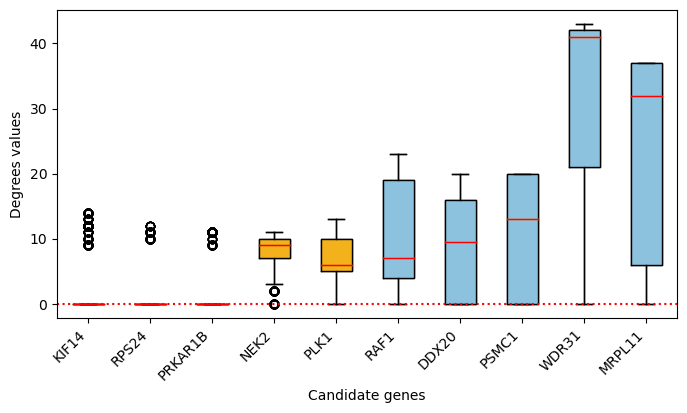

In [31]:
# Step 4: Calculate IQR and Median for degree statistics
iqr_values = df_degree_dict.quantile(0.75) - df_degree_dict.quantile(0.25)
median_values = df_degree_dict.median()

# Sort columns by IQR
sorted_columns = iqr_values.sort_values().index

# Step 5: Plot boxplot for degree statistics
fig, ax = plt.subplots(figsize=(8, 4))

# Boxplot with sorted columns
ax.boxplot(df_degree_dict[sorted_columns].values)

# Define box colors
box_colors = ['#8cc2de', '#8cc2de', '#8cc2de', '#f3b11b', '#f3b11b', '#8cc2de', '#8cc2de', '#8cc2de', '#8cc2de', '#8cc2de']
boxplot = ax.boxplot(df_degree_dict[sorted_columns].values, patch_artist=True)
for i, box in enumerate(boxplot['boxes']):
    box.set(facecolor=box_colors[i % len(box_colors)])

# Set median line color
median_color = 'red'
for median in boxplot['medians']:
    median.set(color=median_color)

# Customize axis labels and ticks
ax.set_xticks(range(1, len(sorted_columns) + 1))
ax.set_xticklabels(sorted_columns, rotation=45, ha='right')
ax.set_xlabel('Candidate genes')
ax.set_ylabel('Degrees values')

# Add horizontal line at 0
plt.axhline(0, color='red', linestyle=':')

# Save plot as PDF
plt.savefig(f'{res_dir05}/04.SSN4PaCDM_top10_candidate_genes_IQR_degrees_Boxplot.pdf', bbox_inches="tight", dpi=300)
plt.show()


In [32]:
# Step 6: Save IQR and Median values as a table
IQR_df = pd.DataFrame({
    'Gene': sorted_columns,
    'IQR': iqr_values,
    'Median': median_values
}).sort_values(by='IQR', ascending=True)
# Save to CSV
IQR_df.to_csv(f'{res_dir05}/05.SSN4PaCDM_top10_candidate_genes_IQR_degrees_Table.csv', index=None)
IQR_df

,Gene,IQR,Median
KIF14,RAF1,0.0,0.0
RPS24,PSMC1,0.0,0.0
PRKAR1B,MRPL11,0.0,0.0
NEK2,WDR31,3.0,9.0
PLK1,DDX20,5.0,6.0
RAF1,PRKAR1B,15.0,7.0
DDX20,NEK2,16.0,9.5
PSMC1,PLK1,20.0,13.0
WDR31,KIF14,21.0,41.0
MRPL11,RPS24,31.0,32.0


### 6.4: Analysis for Specific Genes (NEK2 and PLK1 Networks)

In [33]:
# Analyze specific gene networks for NEK2 and PLK1
ssn_all_edges = pd.read_csv(f'{res_dir05}/01.ssn_all_different_edges.csv')

In [34]:
# Extract edges containing PLK1
PLK1_network = ssn_all_edges[ssn_all_edges['edge'].str.contains('PLK1')]
PLK1_network.to_csv(f'{res_dir06}/03.SSN4PaCDM_PLK1_network.csv', index=None)
PLK1_network

,edge,p_value,Gene1,Gene2
6,PLK1+RAD21,4.621524e-10,PLK1,RAD21
61,ANLN+PLK1,8.104447e-08,ANLN,PLK1
75,PLK1+TPX2,1.364160e-07,PLK1,TPX2
107,GORASP2+PLK1,2.703900e-07,GORASP2,PLK1
155,MAD2L1+PLK1,8.432543e-07,MAD2L1,PLK1
380,PLK1+RRM2,5.952348e-06,PLK1,RRM2
553,CKS2+PLK1,1.843033e-05,CKS2,PLK1
617,CDC14A+PLK1,2.456503e-05,CDC14A,PLK1
685,PLK1+TK1,3.291983e-05,PLK1,TK1
709,PLK1+RAB1A,3.608026e-05,PLK1,RAB1A


**03.screen_SSN4PaCDM_PLK1_network**

![Cytoscape](./figures/03.screen_SSN4PaCDM_PLK1_network.png)

In [35]:
# Extract edges containing NEK2
NEK2_network = ssn_all_edges[ssn_all_edges['edge'].str.contains('NEK2')]
NEK2_network.to_csv(f'{res_dir06}/04.SSN4PaCDM_NEK2_network.csv', index=None)
NEK2_network

,edge,p_value,Gene1,Gene2
26,NCAPH+NEK2,1.498507e-08,NCAPH,NEK2
37,CEP55+NEK2,2.994982e-08,CEP55,NEK2
73,CDC20+NEK2,1.254402e-07,CDC20,NEK2
99,MKI67+NEK2,2.530881e-07,MKI67,NEK2
162,MAD2L1+NEK2,9.223112e-07,MAD2L1,NEK2
186,KIF18A+NEK2,1.360567e-06,KIF18A,NEK2
200,NEK2+PPP1CC,1.640373e-06,NEK2,PPP1CC
280,CENPA+NEK2,3.145528e-06,CENPA,NEK2
349,CKS2+NEK2,5.108799e-06,CKS2,NEK2
568,FOXM1+NEK2,1.936059e-05,FOXM1,NEK2


**04.screen_SSN4PaCDM_NEK2_network**

![Cytoscape](./figures/04.screen_SSN4PaCDM_NEK2_network.png)

### 6.5: Select Target Gene List for KEGG pathway analysis

In [ ]:
diff_edges = pd.read_csv(res_dir06+'/01.SSN4PaCDM_function_gene_nework(975_different_edges_p<0.0001).csv')
diff_edges

,Gene1,Gene2,p_value
0,KRAS,YWHAZ,2.845296e-11
1,FGA,ITIH2,1.100965e-10
2,ERCC8,MSH3,1.546092e-10
3,ARF1,WASF1,2.611256e-10
4,KRAS,RASGRP4,4.428722e-10
...,...,...,...
970,GATA3,LMO2,9.820227e-05
971,RPS11,RPS24,9.862069e-05
972,SKA2,SPDL1,9.922331e-05
973,CD28,GATA3,9.943530e-05


In [37]:
# Target genes
target_genes = ["WDR31", "MRPL11", "RAF1", "DDX20", "PSMC1", "KIF14", "PLK1", "RPS24", "NEK2", "PRKAR1B"]

# Find genes connected to target genes in Gene1 and Gene2
connected_genes_1 = diff_edges[diff_edges['Gene1'].isin(target_genes)]['Gene2']
connected_genes_2 = diff_edges[diff_edges['Gene2'].isin(target_genes)]['Gene1']

# Combine all connected genes and remove duplicates
connected_genes = pd.concat([connected_genes_1, connected_genes_2]).drop_duplicates().tolist()

# Merge target genes with connected genes and remove duplicates
kegg_gene_list = list(set(target_genes + connected_genes))

# Save all genes as a KEGG gene list
res_dir07 = 'results/07.res_kegg_pathway_analysis'
os.makedirs(res_dir07, exist_ok=True)
with open(f'{res_dir07}/01.SSN4PaCDM_kegg_gene_list.txt', 'w') as f:
    for gene in kegg_gene_list:
        f.write(f"{gene}\n")

In [38]:
print(len(target_genes))
print(len(connected_genes))
print(len(kegg_gene_list))

10
138
144


In [39]:
kegg_gene_list

['RPS3',
 'NUP133',
 'RPL36',
 'RAF1',
 'NEK2',
 'CFTR',
 'UBE2C',
 'RPS9',
 'PSMC1',
 'MAD2L1BP',
 'SCNN1B',
 'HSP90AA1',
 'RPL12',
 'RPL36AL',
 'UBC',
 'RPL13',
 'NCBP2',
 'ECT2',
 'KIF14',
 'RPL7',
 'CDC20',
 'RPL9',
 'RPLP1',
 'RPL7A',
 'CEP55',
 'RPS15',
 'CENPA',
 'EZR',
 'PPP1CC',
 'RPL18A',
 'NUP188',
 'INPP5D',
 'EEF2',
 'CDC14A',
 'RPL6',
 'STRAP',
 'RPS5',
 'PSMB11',
 'NCAPH',
 'FAM131B',
 'RPL24',
 'TK1',
 'PSMA8',
 'RPS20',
 'PRKCZ',
 'RPLP2',
 'AURKA',
 'NFKBIA',
 'SNUPN',
 'RPL3',
 'RPS16',
 'RPS6',
 'CKS2',
 'PRKAR1B',
 'IQGAP1',
 'TOP2A',
 'RPL21',
 'EEF1A1',
 'NUP210',
 'PPP2R1A',
 'WDR31',
 'SNRPE',
 'CCND1',
 'HJURP',
 'RPL14',
 'RPL10',
 'SLC9A3R1',
 'CSK',
 'SNRPG',
 'RPL11',
 'RPL22L1',
 'MAD2L1',
 'UBA52',
 'LSM11',
 'FLOT1',
 'HSP90AB1',
 'SNRPD2',
 'NUP153',
 'RPL23',
 'PSMB1',
 'GORASP2',
 'ZWINT',
 'EIF3I',
 'RAB1A',
 'DDX20',
 'RPS23',
 'TPX2',
 'PRKACG',
 'RBL2',
 'ANLN',
 'HSPA8',
 'RPS21',
 'MLC1',
 'UBB',
 'DICER1',
 'MRPL11',
 'FOXL2',
 'RPS19',
 'YWHA

## Part 7: KEGG pathway Analysis

### Notes

**Functional Gene Network Enrichment Pathway Analysis**  
   Functional gene network pathway enrichment analysis was conducted using **R**.  
   Please refer to the directory: `results/07.res_kegg_pathway_analysis/SSN4PaCDM_KEGG_pathway_analysis.R` for the R script and results.


**KEGG pathway Analysis**

insulin_kegg_pathway             |  kegg_scaled
:-------------------------:|:-------------------------:
![Cytoscape](./results/07.res_kegg_pathway_analysis/03.SSN4PaCDM_insulin_kegg_pathway.png)|![Cytoscape](./results/07.res_kegg_pathway_analysis/05.SSN4PaCDM_kegg_scaled.png)